In [0]:
import numpy as np
import matplotlib.pyplot as plt

class SORGP:
  def __init__(self, inducing_points, dim ):
    self.M = len(inducing_points)
    self.D = dim
    self.inducing_points = inducing_points

  def k(self, xi, xj):
    return 1.0 * np.exp(-0.5 * 1.0 * np.sum((xi - xj) * (xi - xj), 2)) 

  def cov(self, xi, xj ):
    a = np.tile( xi.reshape(-1,1,self.D), (1, len(xj), 1) )
    b = np.tile( xj.reshape(1,-1,self.D), (len(xi), 1, 1) )
    return self.k(a,b)

  def learn(self, xt, yt ):
    self.xt = np.array(xt)
    self.yt = np.array(yt)
    N = len(xt)

    self.sig2 = 1.0

    # カーネル行列を定義
    self.Kmm = self.cov( self.inducing_points, self.inducing_points )
    self.Kmm_inv = np.linalg.inv( self.Kmm+np.eye(self.M, self.M) )
    self.Knm = self.cov( self.xt, self.inducing_points )
    self.Kmn = self.Knm.T
    self.Knn = self.cov( self.xt, self.xt )
    self.Knn_ = np.dot( np.dot(self.Knm, self.Kmm_inv), self.Kmn )

    # Σ
    self.S = np.linalg.inv( self.Kmm + 1/self.sig2 * np.dot(self.Kmn, self.Knm) )

  def plot(self, x):
      mus, sigmas = self.predict( x.reshape(-1,1) )
      plt.plot( x, mus )
      
      y_max = mus + np.sqrt(sigmas.flatten())
      y_min = mus - np.sqrt(sigmas.flatten())

      plt.fill_between(x, y_min, y_max, facecolor="lavender" , alpha=0.9 , edgecolor="lavender"  )

      for p in self.inducing_points:
        plt.plot( p, [0.0], "kx" )
      plt.plot(self.xt, self.yt)
      plt.show()

  def predict( self, x ):
    x = np.array(x)
    mus = []
    sigmas = []
    K = len(x)

    Kxm = self.cov( x.reshape(-1,1), self.inducing_points )
    Kmx = Kxm.T

    sig = np.dot(np.dot( Kxm, self.S ), Kmx )
    mu = 1/self.sig2 * np.dot( np.dot( np.dot(Kxm, self.S ), self.Kmn), self.yt.reshape(-1,1) )
        
    return mu.flatten(), np.diag(sig).flatten()


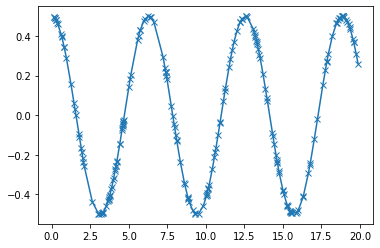

In [2]:
xt = np.sort(np.random.rand(200)*20)
yt = np.cos(xt)/2

plt.plot( xt, yt, "x-" )

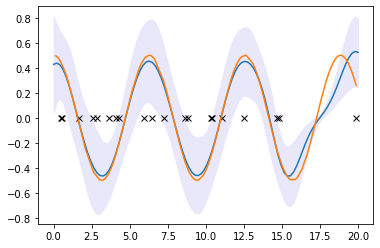

CPU times: user 257 ms, sys: 114 ms, total: 371 ms
Wall time: 250 ms


In [3]:
%%time
gp = SORGP( np.random.rand(20,1)*20 , 1)
gp.learn( xt.reshape((-1,1)), yt )
gp.plot(np.linspace( 0,20,100 ))

In [4]:
%%time
gp.predict(np.linspace( 0,20,100 ).reshape(-1,1))

CPU times: user 163 µs, sys: 1.97 ms, total: 2.14 ms
Wall time: 1.86 ms


(array([ 0.4273105 ,  0.43701774,  0.42447648,  0.38910788,  0.3326617 ,
         0.25881466,  0.1724728 ,  0.07898212, -0.01655274, -0.10970844,
        -0.19690264, -0.27531995, -0.34270186, -0.39711172, -0.43676862,
        -0.46001062, -0.46540557, -0.45198339, -0.41952327, -0.36880434,
        -0.30173108, -0.22128001, -0.1312715 , -0.0360271 ,  0.05999618,
         0.15251243,  0.23761314,  0.31188312,  0.37246848,  0.41713942,
         0.44436272,  0.45336406,  0.44414267,  0.41741155,  0.37447102,
         0.31705993,  0.24724547,  0.16739551,  0.08023195, -0.01108867,
        -0.10295262, -0.19139996, -0.27239244, -0.34218771, -0.39770934,
        -0.43678967, -0.45820874, -0.46154144, -0.44691283, -0.41480303,
        -0.36601371, -0.3018188 , -0.22421869, -0.13615087, -0.04151673,
         0.05504352,  0.14859384,  0.23444847,  0.30867829,  0.36846102,
         0.41221383,  0.43950192,  0.4507544 ,  0.44684506,  0.42862449,
         0.39652528,  0.3503867 ,  0.28962739,  0.2